## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
combined_data['Mouse ID'].value_counts()

g989    13
o287    10
w914    10
h246    10
l509    10
        ..
h428     1
t573     1
b447     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep = False)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].value_counts()

o287    10
s185    10
h246    10
l509    10
j119    10
        ..
f932     1
t573     1
u153     1
d133     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_data = cleaned_data.groupby('Drug Regimen')
mean = drug_data['Tumor Volume (mm3)'].mean()
median = drug_data['Tumor Volume (mm3)'].mean()
variance = drug_data['Tumor Volume (mm3)'].var()
std = drug_data['Tumor Volume (mm3)'].std()
sem = drug_data['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean': mean, 
                       'Median': median,
                       'Variance': variance,
                       'Standard Deviation': std,
                       'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.458254,52.458254,44.053659,6.637293,0.540135
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = drug_data['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])
summary 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

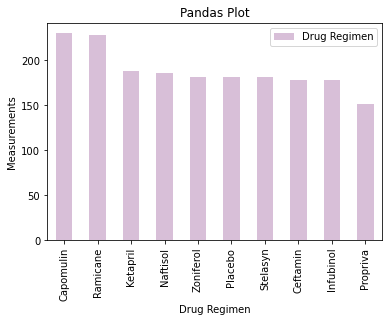

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = pd.DataFrame(cleaned_data['Drug Regimen'].value_counts())
pandas_plot = measurements_df.plot(kind="bar", title=("Pandas Plot"), color='thistle')
pandas_plot.set_xlabel('Drug Regimen')
pandas_plot.set_ylabel('Measurements')

Text(0, 0.5, 'Measurements')

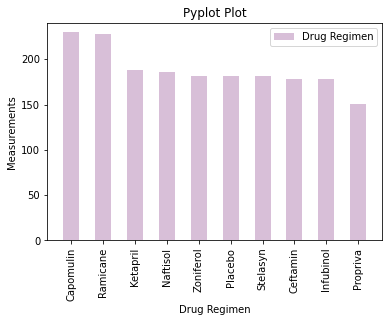

In [80]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements = cleaned_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(measurements))
plt.bar(x_axis, measurements, color='thistle', align="center", width=0.5, label='Drug Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements_df.index, rotation = 90)
plt.legend(loc='best')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(measurements)+10)
plt.title("Pyplot Plot")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")

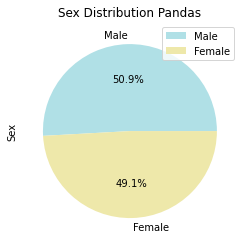

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution_df = pd.DataFrame(cleaned_data['Sex'].value_counts())
sex_distribution_pandas = sex_distribution_df.plot(kind = 'pie', y = 'Sex', title = 'Sex Distribution Pandas', autopct='%1.1f%%', colors = ['powderblue', 'palegoldenrod'])

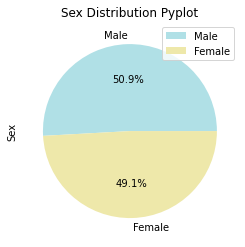

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution = cleaned_data['Sex'].value_counts()
x_axis = np.arange(len(distribution))
labels = sex_distribution_df.index
sizes = distribution
colors = ['powderblue', 'palegoldenrod']
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False)
plt.title("Sex Distribution Pyplot")
plt.ylabel("Sex")
plt.legend(loc='best')

## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group_df = cleaned_data.groupby('Mouse ID')
max_timepoint = pd.DataFrame(mouse_group_df['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(max_timepoint, cleaned_data, on = ['Mouse ID', 'Timepoint'])
drug_group_df = final_tumor_df.set_index('Drug Regimen')
promising_drug_df = drug_group_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
promising_drug_df

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,b128,45,Female,9,22,38.982878,2
Capomulin,b742,45,Male,7,21,38.939633,0
Capomulin,f966,20,Male,16,17,30.485985,0
Capomulin,g288,45,Male,3,19,37.074024,1
Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...
Ceftamin,x226,0,Male,23,28,45.000000,0
Ceftamin,x581,45,Female,19,28,64.634949,3
Ceftamin,x822,45,Male,3,29,61.386660,3


In [189]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for treatment in treatments:
    tumor_vol.append(promising_drug_df.loc[treatment, 'Tumor Volume (mm3)'])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in tumor_vol:
    quartiles = i.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of {i.index[1]} is: {lowerq}")
    print(f"The upper quartile of {i.index[1]} is: {upperq}")
    print(f"The interquartile range of {i.index[1]} is: {iqr}")
    print(f"The the median of {i.index[1]} is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    for o in i:
        if o < lower_bound or o > upper_bound:
            print(f"Outliers are {o}.")
    print("\n")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers are 36.321345799999996.


The lower quartile of Ceftamin is: 48.72207785
The upper quartile of 

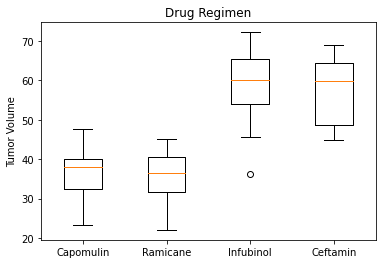

In [198]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Vol vs Timepoint'}, xlabel='Timepoint'>

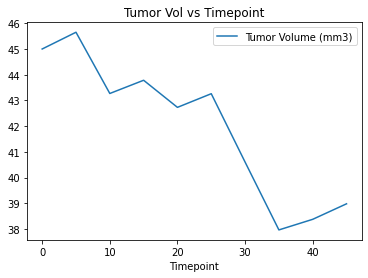

In [213]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_data.set_index('Mouse ID')
capomulin = capomulin_df.loc['b128']
capomulin.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', title = 'Tumor Vol vs Timepoint')

Text(0, 0.5, 'Tumor Volume')

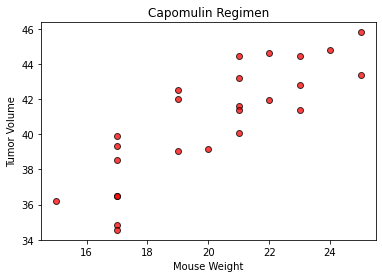

In [239]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
capomulin_group = capomulin_data.groupby('Mouse ID')
average_tumor_vol = capomulin_group['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_group['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_vol, facecolors="red", edgecolors="black", alpha = 0.75)
plt.title("Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

## Correlation and Regression

In [241]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


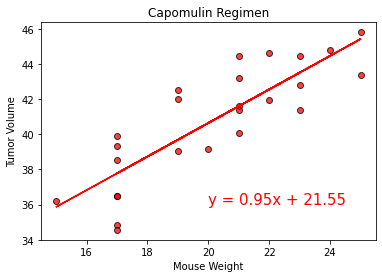

In [249]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, average_tumor_vol, facecolors="red", edgecolors="black", alpha = 0.75)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()